In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def load_and_concatenate_data(input_dim=2, 
                              partition=4, 
                              use_pseudorehearsal=False, 
                              optimizer='sgd', 
                              trials=30, 
                              num_models=6):
    """
    Load and concatenate data from specified trials and models.
    
    Parameters:
    - input_dim (int): Input dimension.
    - partition (int): Partition number.
    - use_pseudorehearsal (bool): Whether pseudo rehearsal is used.
    - optimizer (str): Type of optimizer.
    - trials (int): Number of trials.
    - num_models (int): Number of models.

    Returns:
    - dict: Dictionary containing concatenated data for min_distance, max_distance, and model perturbations.
    """

    base_folder = f"results/input_dim_{input_dim}_partition_num_{partition}_\
{use_pseudorehearsal}_{optimizer}"

    # Initialize the main data storage with the desired structure
    data = {
        "min_distance": [],
        "max_distance": []
    }

    for j in range(num_models):
        data[f"model_{j}_perturbations"] = []

    for i in range(trials):
        trial_folder = f"{base_folder}/trial_{i}"

        min_distance_path = f"{trial_folder}/distances/min_distances.npy"
        max_distance_path = f"{trial_folder}/distances/max_distances.npy"

        # Load the distances from the numpy files
        if os.path.exists(min_distance_path):
            min_distance = np.load(min_distance_path)
            data["min_distance"].append(min_distance)
        else:
            print(f"Warning: {min_distance_path} not found.")

        if os.path.exists(max_distance_path):
            max_distance = np.load(max_distance_path)
            data["max_distance"].append(max_distance)
        else:
            print(f"Warning: {max_distance_path} not found.")

        for j in range(num_models):
            perturbation_path = f"{trial_folder}/perturbations/model_{j}/absolute_perturbation.npy"

            # Load the perturbation from the numpy file
            if os.path.exists(perturbation_path):
                perturbation_data = np.load(perturbation_path)
                data[f"model_{j}_perturbations"].append(perturbation_data)
            else:
                print(f"Warning: {perturbation_path} not found.")
 
    # Convert lists of numpy arrays to a single concatenated numpy array
    for key in data:
        if data[key]:  # Check if the list is not empty
            data[key] = np.concatenate(data[key], axis=0).flatten()
        else:
            data[key] = None  # Set the value to None if the list is empty

    return data

# Define your dictionary of parameters, this will be the parameters of our function of interest.
arguments = {
    'input_dim': 6,
    'partition': 8,
    'use_pseudorehearsal': False,
    'optimizer': 'sgd',
    'trials': 30,
    'num_models': 6
}

def load_and_save_data(input_dim=2, 
                       partition=4, 
                       use_pseudorehearsal=False, 
                       optimizer='sgd', 
                       trials=30, 
                       num_models=6):
    """
    Load and save data from specified trials and models to a folder.
    
    Parameters:
    - input_dim (int): Input dimension.
    - partition (int): Partition number.
    - use_pseudorehearsal (bool): Whether pseudo rehearsal is used.
    - optimizer (str): Type of optimizer.
    - trials (int): Number of trials.
    - num_models (int): Number of models.
    """

    base_folder = f"results/input_dim_{input_dim}_partition_num_{partition}_\
{use_pseudorehearsal}_{optimizer}"

    # Initialize the main data storage with the desired structure
    data = {
        "min_distance": [],
        "max_distance": []
    }

    for j in range(num_models):
        data[f"model_{j}_perturbations"] = []

    for i in range(trials):
        trial_folder = f"{base_folder}/trial_{i}"

        min_distance_path = f"{trial_folder}/distances/min_distances.npy"
        max_distance_path = f"{trial_folder}/distances/max_distances.npy"

        # Load the distances from the numpy files
        if os.path.exists(min_distance_path):
            min_distance = np.load(min_distance_path)
            data["min_distance"].append(min_distance)
        else:
            print(f"Warning: {min_distance_path} not found.")

        if os.path.exists(max_distance_path):
            max_distance = np.load(max_distance_path)
            data["max_distance"].append(max_distance)
        else:
            print(f"Warning: {max_distance_path} not found.")

        for j in range(num_models):
            perturbation_path = f"{trial_folder}/perturbations/model_{j}/absolute_perturbation.npy"

            # Load the perturbation from the numpy file
            if os.path.exists(perturbation_path):
                perturbation_data = np.load(perturbation_path)
                data[f"model_{j}_perturbations"].append(perturbation_data)
            else:
                print(f"Warning: {perturbation_path} not found.")

    # Convert lists of numpy arrays to a single concatenated numpy array
    for key in data:
        if data[key]:  # Check if the list is not empty
            data[key] = np.concatenate(data[key], axis=0).flatten()
        else:
            data[key] = None  # Set the value to None if the list is empty

    # Save the data
    save_folder = "aggregated_results"
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    save_path = f"{save_folder}/data_input_dim_{input_dim}_partition_{partition}.npy"
    np.save(save_path, data)

# Sample call to the function
load_and_save_data(input_dim=6, partition=8, use_pseudorehearsal=False, optimizer='sgd', trials=30, num_models=6)


def plot_cdfs(input_dim=2, partition=4, use_pseudorehearsal=False, optimizer='sgd', trials=30, num_models=6):
    """
    Plot the cumulative distribution functions (CDFs) for the given parameters.

    Parameters are the same as for the `load_and_concatenate_data` function.
    """

    # Use the function directly, passing the arguments to load the necessary data
    data_values = load_and_concatenate_data(input_dim=input_dim, partition=partition, use_pseudorehearsal=use_pseudorehearsal, optimizer=optimizer, trials=trials, num_models=num_models)
    
    # ... [rest of the function stays the same]

    """def plot_cdfs(input_dim, partition...):
    
    # Use the ** operator to pass the dictionary values as function arguments
    data_values = load_and_concatenate_data(input_dim, partition...)"""
    
    distances = ['min_distance', 'max_distance']

    model_names = {'model_0_perturbations' : "Lookup Table",
         'model_1_perturbations' : "ASESANN",
         'model_2_perturbations' : "Linear",
         'model_3_perturbations' : "Wide ReLU ANN", 
         'model_4_perturbations' : "Deep ReLU ANN", 
         'model_5_perturbations': "One Parameter"
    }

    model_keys = ['model_0_perturbations',
     'model_1_perturbations',
     'model_2_perturbations',
     'model_3_perturbations',
     'model_4_perturbations',
     'model_5_perturbations'
    ]

    df_full = pd.DataFrame(data_values)

    df = df_full#.sample(n=25000)


    # Compute the global maximum perturbation value across all models
    global_max_perturbation = df[model_keys].max().max()

    # Assign the maximum perturbation value to the last row of the dataframe for all model columns
    df.loc[df.shape[0]] = [global_max_perturbation if key in model_keys else np.nan for key in df.columns]

    #plot distributions of model perturbations.


    # Setting the style of seaborn for better visualization
    sns.set_style("whitegrid")

    # Initialize the figure
    plt.figure(figsize=(12, 8))

    # Function to compute ECDF
    def ecdf(data):
        x = np.sort(data)
        n = x.size
        y = np.arange(1, n+1) / n
        return x, y

    # Plotting each model's perturbation data using ECDF
    for key, name in model_names.items():
        if key in df.columns:
            x, y = ecdf(df[key])
            plt.plot(x, y, label=name, lw=4)
            plt.fill_between(x, 0, y, alpha=0.03)


    if arguments['use_pseudorehearsal']:
        prs = "PR"
    else:
        prs = "NPR"

    # Configuring the plot details
    titlestr = f"CDF of {arguments['input_dim'] }D Model Perturbations, Z = {arguments['partition']}, {prs}, \
{arguments['optimizer']}"
    print(titlestr)
    plt.title(titlestr, fontsize=25)
    plt.xlabel('Absolute Perturbation', fontsize=25)
    #plt.xlim(0,4)
    plt.ylabel('Cumulative Probability', fontsize=25)
    plt.legend(fontsize=25, bbox_to_anchor=(0.95, 0.05), loc="lower right")

    # Adjust tick label size
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Display the plot
    plt.tight_layout()
    plt.show()
    
'''
    trial_numbers = list(range(31))
    optimizers = ['adam', 'sgd']
    pseudorehearsals = [True, False]

    for partition in range(1, 11): # Iterate over partition numbers using a for-loop
        input_dim_combinations = [(input_dim, partition, trial_numbers, optimizers, pseudorehearsals) 
                                  for input_dim in range(1, 7)]
'''


"\n    trial_numbers = list(range(31))\n    optimizers = ['adam', 'sgd']\n    pseudorehearsals = [True, False]\n\n    for partition in range(1, 11): # Iterate over partition numbers using a for-loop\n        input_dim_combinations = [(input_dim, partition, trial_numbers, optimizers, pseudorehearsals) \n                                  for input_dim in range(1, 7)]\n"

In [53]:
# Define your dictionary of parameters, this will be the parameters of our function of interest.
arguments = {
    'input_dim': 3,
    'partition': 8,
    'use_pseudorehearsal': False,
    'optimizer': 'sgd',
    'trials': 30,
    'num_models': 6
}

data_values = load_and_concatenate_data(**arguments)

distances = ['min_distance', 'max_distance']

model_names = {'model_0_perturbations' : "Lookup Table",
     'model_1_perturbations' : "ASESANN",
     'model_2_perturbations' : "Linear",
     'model_3_perturbations' : "Wide ReLU ANN", 
     'model_4_perturbations' : "Deep ReLU ANN", 
     'model_5_perturbations': "One Parameter"
}

model_keys = ['model_0_perturbations',
 'model_1_perturbations',
 'model_2_perturbations',
 'model_3_perturbations',
 'model_4_perturbations',
 'model_5_perturbations'
]

df_full = pd.DataFrame(data_values)

df = df_full.sample(n=5000)

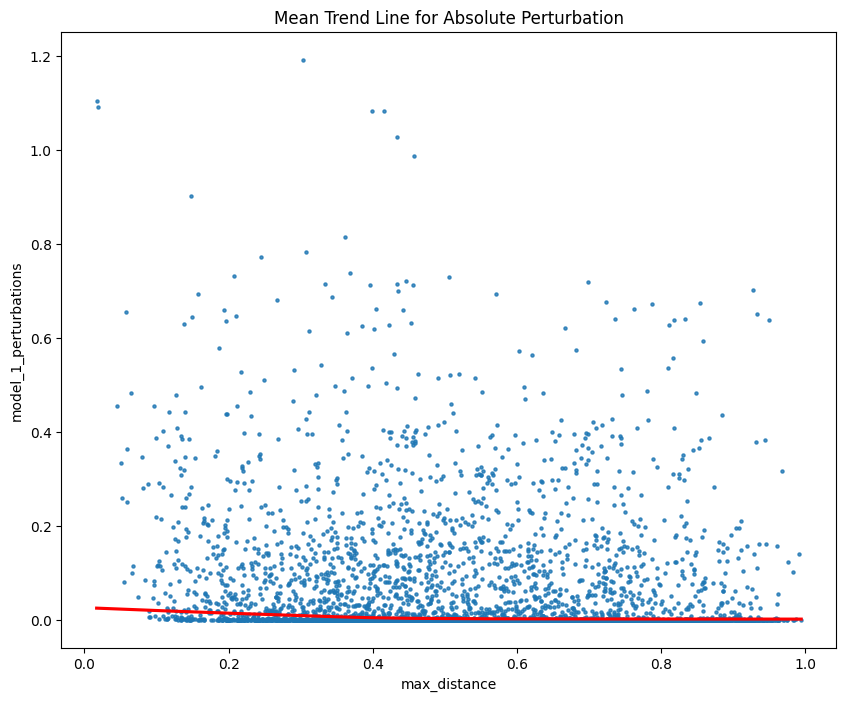

In [55]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# Sample data
# df = pd.DataFrame({'Absolute Perturbation': ..., 'Maximum Absolute Difference': ...})

plt.figure(figsize=(10, 8))
sns.regplot(x=distances[1], y=model_keys[1], data=df, scatter_kws={'s':5}, lowess=True, line_kws={'color': 'red'})
plt.title('Mean Trend Line for Absolute Perturbation')
plt.show()


In [41]:
sns.regplot?

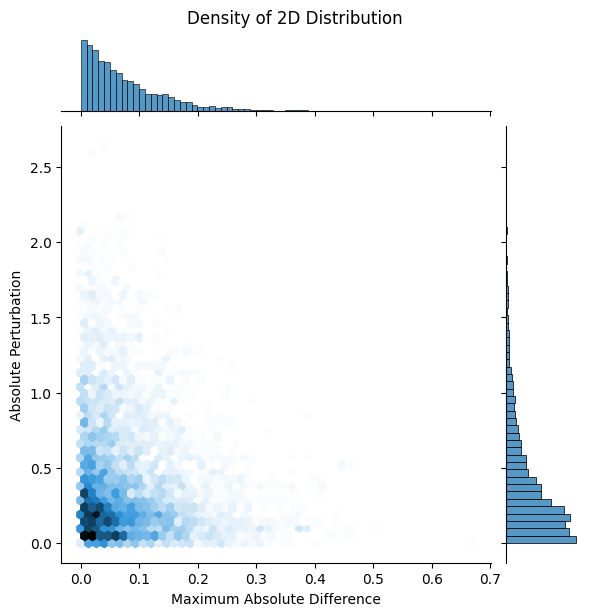

In [38]:
# Alternatively, using jointplot for a scatter plot with histograms
sns.jointplot(x=distances[0], y=model_keys[3], data=df, kind='hex')
plt.suptitle('Density of 2D Distribution', y=1.02)
plt.ylabel('Absolute Perturbation')
plt.xlabel('Maximum Absolute Difference')
plt.show()

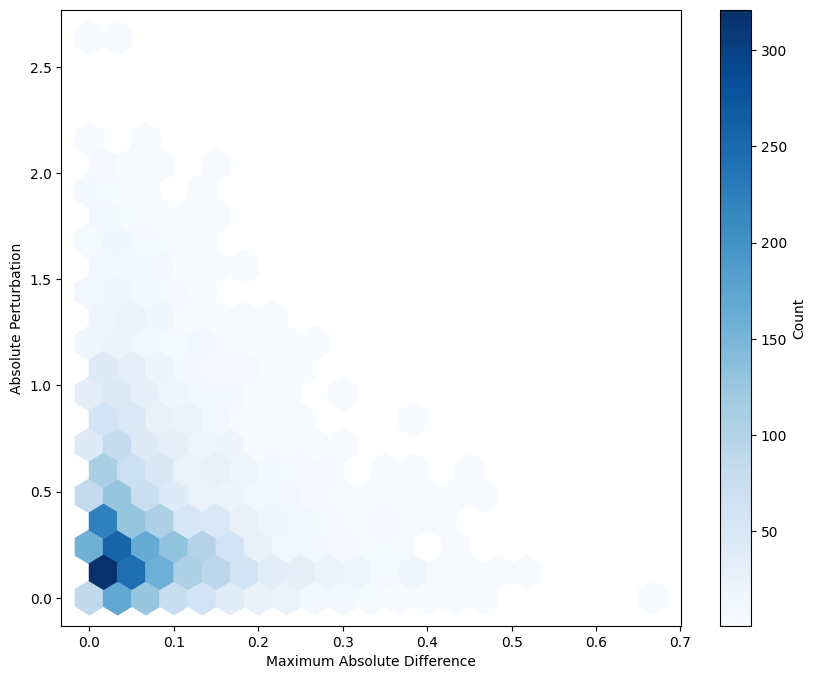

In [37]:
plt.figure(figsize=(10, 8))
plt.hexbin(x=distances[0], y=model_keys[3], data=df, gridsize=20, cmap='Blues', mincnt=1)
plt.colorbar(label='Count')
plt.ylabel('Absolute Perturbation')
plt.xlabel('Maximum Absolute Difference')
plt.show()


CDF of 2D Model Perturbations, Z = 10, NPR, sgd


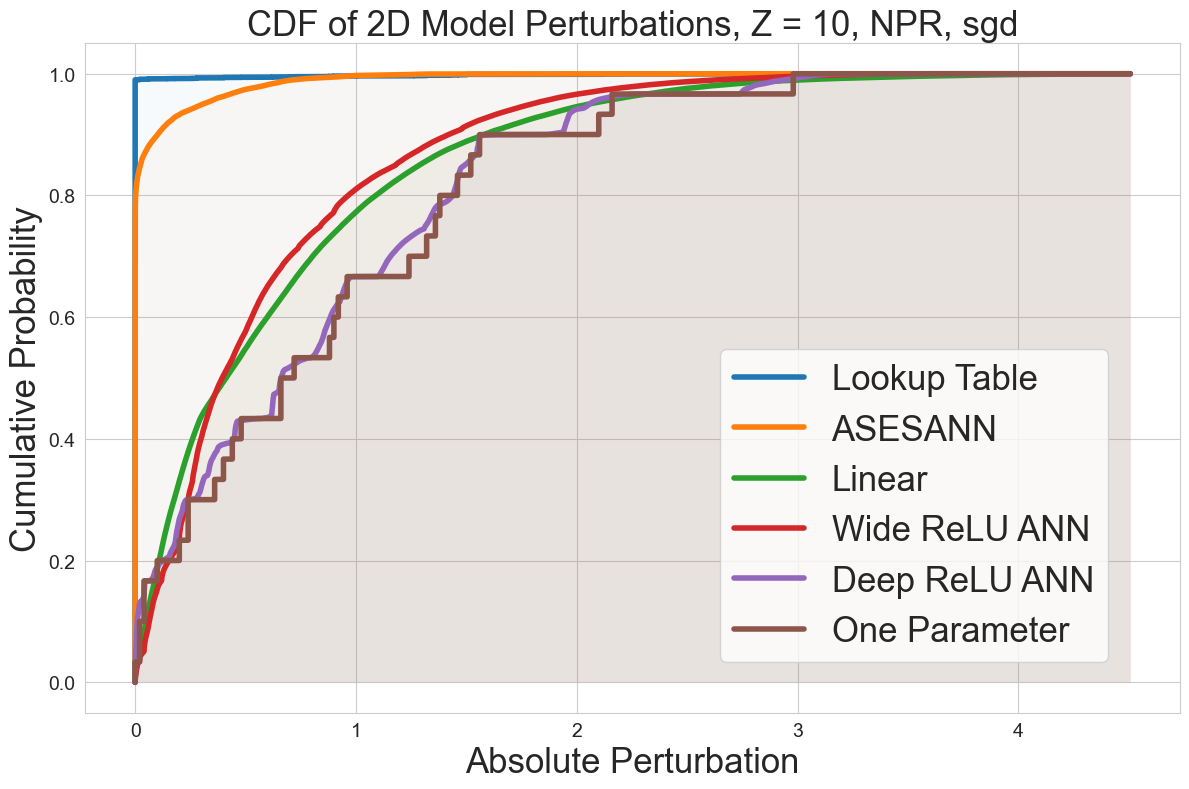

CDF of 2D Model Perturbations, Z = 10, NPR, adam


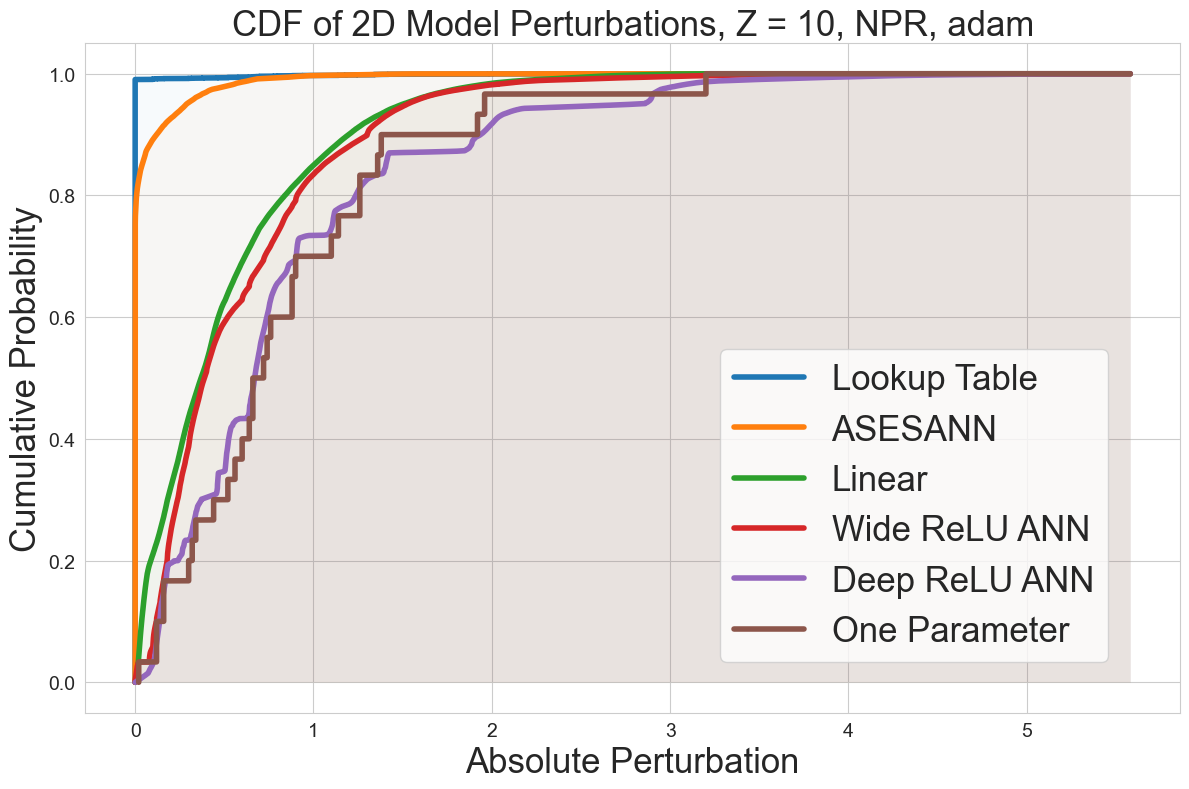

CDF of 2D Model Perturbations, Z = 10, PR, sgd


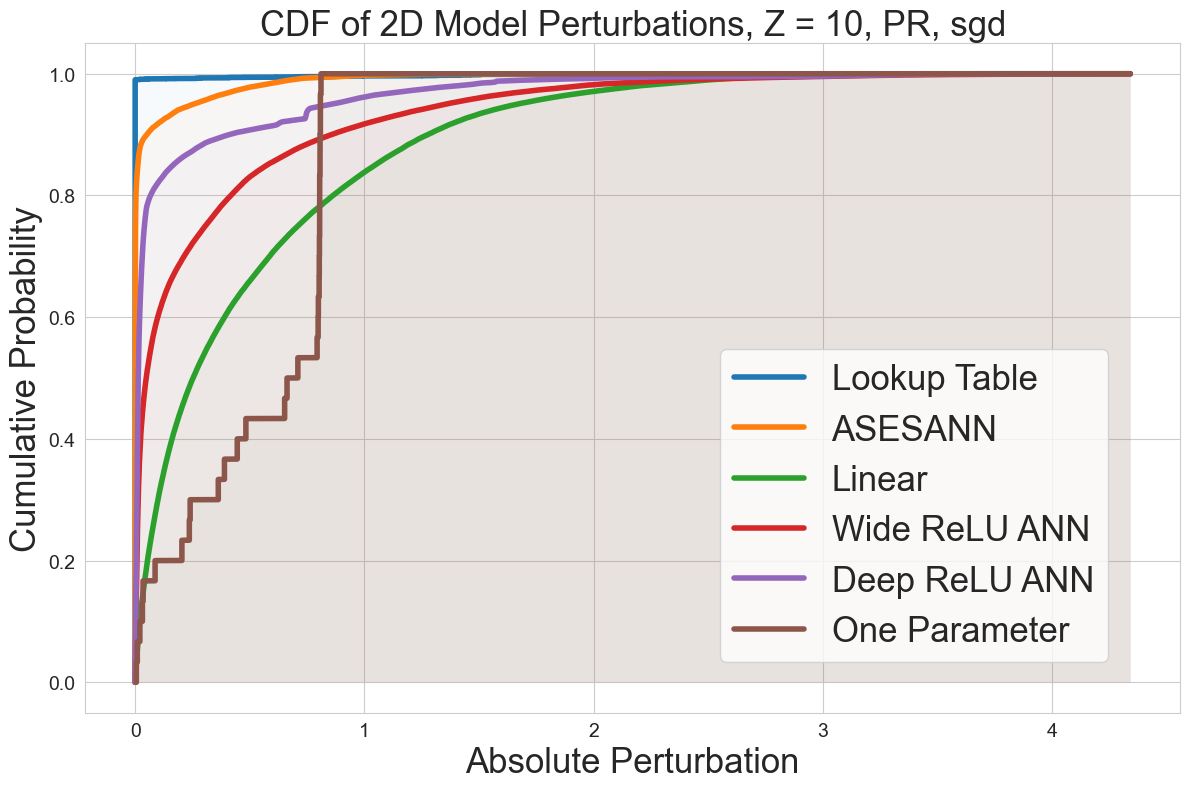

CDF of 2D Model Perturbations, Z = 10, PR, adam


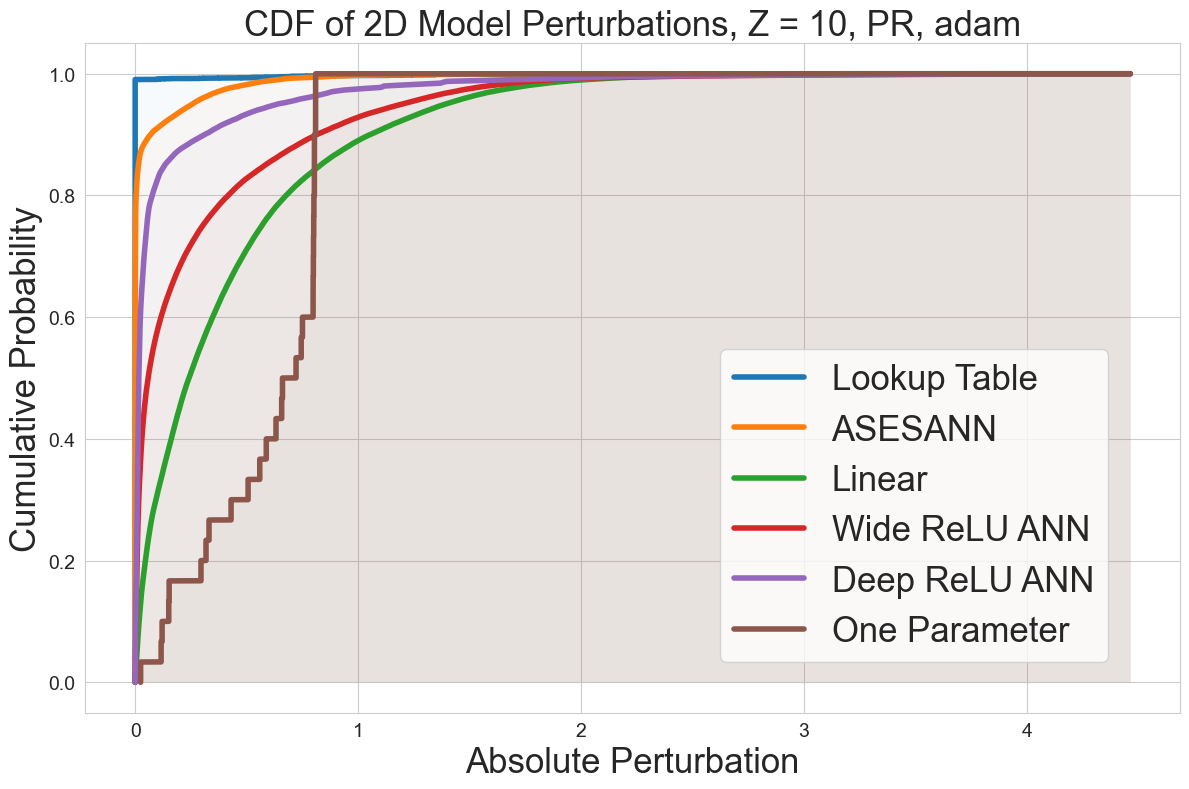

In [21]:
# Iterate over the range of values for each parameter
for partition in range(10, 11):
    for use_pseudorehearsal in [False, True]:
        for optimizer in ['sgd', 'adam']:
            for input_dim in range(2, 3):
                
                # Update the dictionary of parameters based on the current loop iteration values
                arguments = {
                    'input_dim': input_dim,
                    'partition': partition,
                    'use_pseudorehearsal': use_pseudorehearsal,
                    'optimizer': optimizer,
                    'trials': 30,
                    'num_models': 6
                }

                # Call the function with unpacked arguments
                plot_cdfs(**arguments)
